# Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Download ans prepare the CIFAR10 dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:

# Passage d'une dataset de 50 000 inputs a une dataset de 10 000 inputs
#train_images = train_images[:10000]
#train_labels = train_labels[:10000]

#test_images = test_images[:10000]
#test_labels = test_labels[:10000]
print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:


# Normalize pixel values to be betwen 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0



In [5]:

print(train_images.shape)



(50000, 32, 32, 3)


# Verify the Data

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


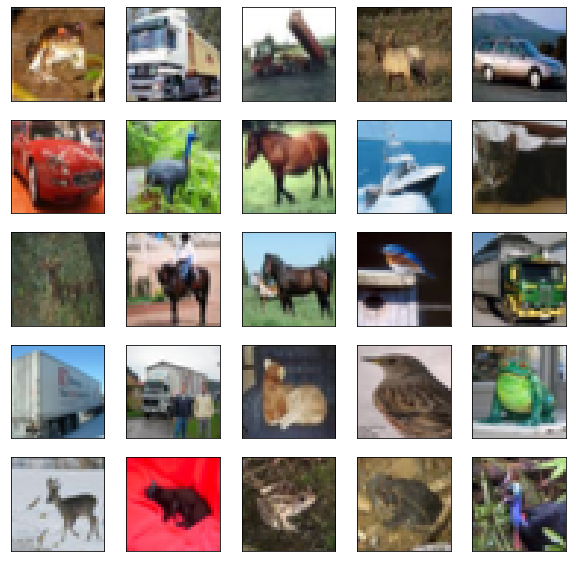

In [7]:


# Let's plot the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]], color='white')
plt.show()



# Create the Convolutional Base

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [11]:


# Complete Architecture of our model
model.summary()




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

# Compile and Train the model

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 39s 776us/sample - loss: 1.4925 - acc: 0.4579 - val_loss: 1.2565 - val_acc: 0.5598
Epoch 2/10
50000/50000 [==============================] - 43s 860us/sample - loss: 1.1284 - acc: 0.6021 - val_loss: 1.0899 - val_acc: 0.6198
Epoch 3/10
50000/50000 [==============================] - 43s 865us/sample - loss: 0.9809 - acc: 0.6549 - val_loss: 0.9461 - val_acc: 0.6715
Epoch 4/10
50000/50000 [==============================] - 44s 871us/sample - loss: 0.8808 - acc: 0.6913 - val_loss: 0.9067 - val_acc: 0.6854
Epoch 5/10
50000/50000 [==============================] - 44s 871us/sample - loss: 0.8072 - acc: 0.7183 - val_loss: 0.9012 - val_acc: 0.6860
Epoch 6/10
50000/50000 [==============================] - 44s 876us/sample - loss: 0.7516 - acc: 0.7376 - val_loss: 0.8994 - val_acc: 0.6969
Epoch 7/10
50000/50000 [==============================] - 44s 881us/sample - loss: 0.7044 - acc: 0.7536 

# Evaluate the model

In [16]:

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



KeyError: 'accuracy'

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

10000/10000 - 2s - loss: 0.8691 - acc: 0.7159


In [18]:
print(test_acc)

0.7159


In [54]:
 tf.keras.models.load_model

<function tensorflow.python.keras.saving.save.load_model(filepath, custom_objects=None, compile=True)>

In [56]:
# Save the entire model as a SavedModel.
!mkdir saved_model
model.save('saved_model/my_model.pb') 

In [57]:
# my_model directory
!ls saved_model

my_model.pb


In [59]:
# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model.pb

saved_model/my_model.pb


In [60]:
!ls saved_model/my_model

ls: cannot access 'saved_model/my_model': No such file or directory


/bin/sh: 1: my_model: not found
